In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import time
from sklearn import metrics
import matplotlib as mpl
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [4]:
#設定字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [5]:
#匯入data
data = pd.read_csv("C:\\ObesityDataSet_raw_and_data_sinthetic.csv")

In [6]:
#文字轉數值
for col in data[["Gender","family_history_with_overweight","FAVC", "CAEC", "SMOKE", "SCC","CALC", "MTRANS", "NObeyesdad"]]:
    LE=LabelEncoder()
    data[col]=LE.fit_transform(data[col])

In [7]:
#資料標準化
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_test_columns=["Gender", "Age", "Height","Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"]
data= pd.DataFrame(scaled_features, columns=data_test_columns)

In [8]:
#降維
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
data= pca.fit_transform(data)
data

array([[ 2.11333232, -0.24069465],
       [ 2.75459606,  0.57464561],
       [-0.01834083,  2.0218792 ],
       ...,
       [-1.31154838,  0.08814977],
       [-1.57248078, -0.0052612 ],
       [-1.53313085,  0.04908362]])

In [9]:
## 畫分群圖
def get_HT(X,Y,label_pred,name='k_means'):
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False 
    
    x0 = X[label_pred == 0]
    x1 = X[label_pred == 1]
    x2 = X[label_pred == 2]
    plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='簇1')  
    plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='簇2')  
    plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='簇3')  
    plt.xlabel('sepal length')  
    plt.ylabel('sepal width')  
    plt.legend(loc=2)  
    plt.title(name + "聚类结果")
    plt.show()
    
    sum = 0

In [10]:
#純度
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

K-means分群時間: 0.054040100000008806 秒
K-means之Silhouette Coefficient: 0.40400356060900444
K-means之Calinski Harabasz Score: 1795.4168318420498


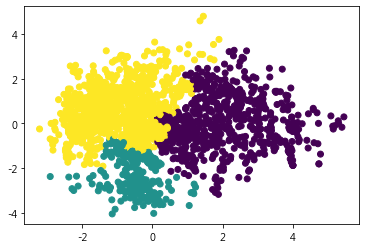

In [18]:
#Kmeans算法
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
t1 = time.perf_counter()
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(data)
t2 = time.perf_counter()

print("K-means分群時間:", t2-t1, "秒")
print("K-means之Silhouette Coefficient:", silhouette_score(data, Kmeans.labels_))
print("K-means之Calinski Harabasz Score:", calinski_harabasz_score(data, Kmeans.labels_))
plt.scatter(data[:,0], data[:,1], c=clusters)

階層式分群分群時間: 0.07052860000001715 秒
階層式分群之Silhouette Coefficient: 0.35222722256364036
階層式分群之Calinski Harabasz Score: 1427.9024754434872


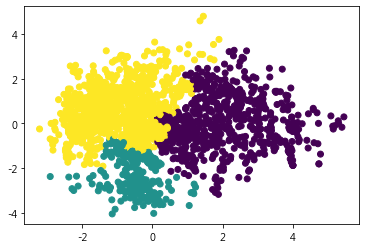

In [16]:
#階層式分群算法

t1 = time.perf_counter()
dis = sch.linkage(data ,metric="euclidean", method="ward") #metric:距離的計算方式, method:群與群之間的計算方式
clusters = sch.fcluster(dis, 3, criterion="maxclust")
t2 = time.perf_counter()
print("階層式分群分群時間:", t2-t1, "秒")
print("階層式分群之Silhouette Coefficient:", silhouette_score(data, clusters))
print("階層式分群之Calinski Harabasz Score:", calinski_harabasz_score(data, clusters))
plt.scatter(data[:,0], data[:,1], c=clusters)

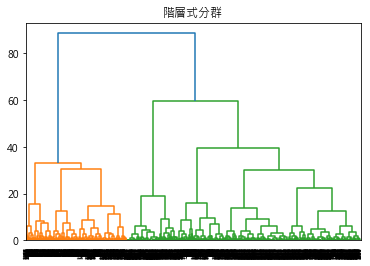

In [17]:
#顯示階層式分群圖
sch.dendrogram(dis)
plt.title("階層式分群")
plt.show()

DBSCAN分群時間: 0.01913230000002386 秒
DBSCAN之Silhouette Coefficient: 0.3884653049609929
DBSCAN之Calinski Harabasz Score: 55.94003655246667


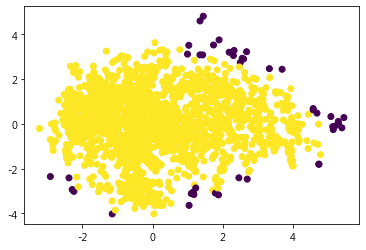

In [33]:
#DBSCAN算法
t1 = time.perf_counter()
DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit(data)
t2 = time.perf_counter()

print("DBSCAN分群時間:", t2-t1, "秒")
print("DBSCAN之Silhouette Coefficient:", silhouette_score(data, DBSCAN.labels_))
print("DBSCAN之Calinski Harabasz Score:", calinski_harabasz_score(data, DBSCAN.labels_))

plt.scatter(data[:,0], data[:,1], c=DBSCAN.labels_)